<a href="https://colab.research.google.com/github/sandesarikeerthi/2303a51635-batch-23/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2960651373.py:14: SyntaxWarning: invalid escape sequence '\$'
  df['Tuition and fees'] = df['Tuition and fees'].replace('[\$,]', '', regex=True).astype(float)


Top 5 Universities by Rank:

                    Name       Location  Rank  Tuition and fees  \
0   Princeton University  Princeton, NJ     1           45320.0   
1     Harvard University  Cambridge, MA     2           47074.0   
2  University of Chicago    Chicago, IL     3           52491.0   
3        Yale University  New Haven, CT     3           49480.0   
4    Columbia University   New York, NY     5           55056.0   

   Undergrad Enrollment  
0                5402.0  
1                6699.0  
2                5844.0  
3                5532.0  
4                6102.0  

Correlation Matrix:

                          Rank  Tuition and fees  Undergrad Enrollment
Rank                  1.000000         -0.715094             -0.040771
Tuition and fees     -0.715094          1.000000             -0.386056
Undergrad Enrollment -0.040771         -0.386056              1.000000


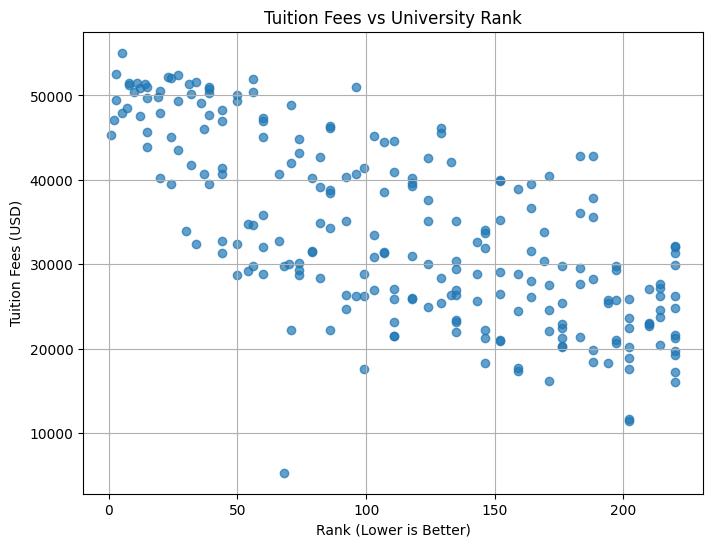

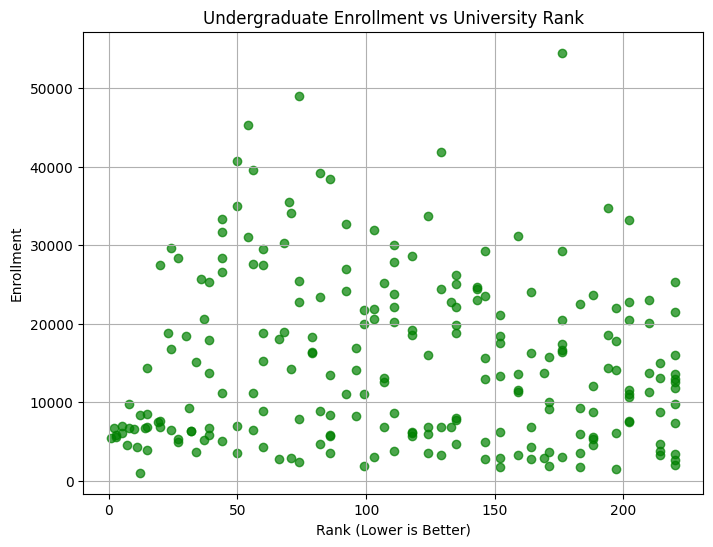

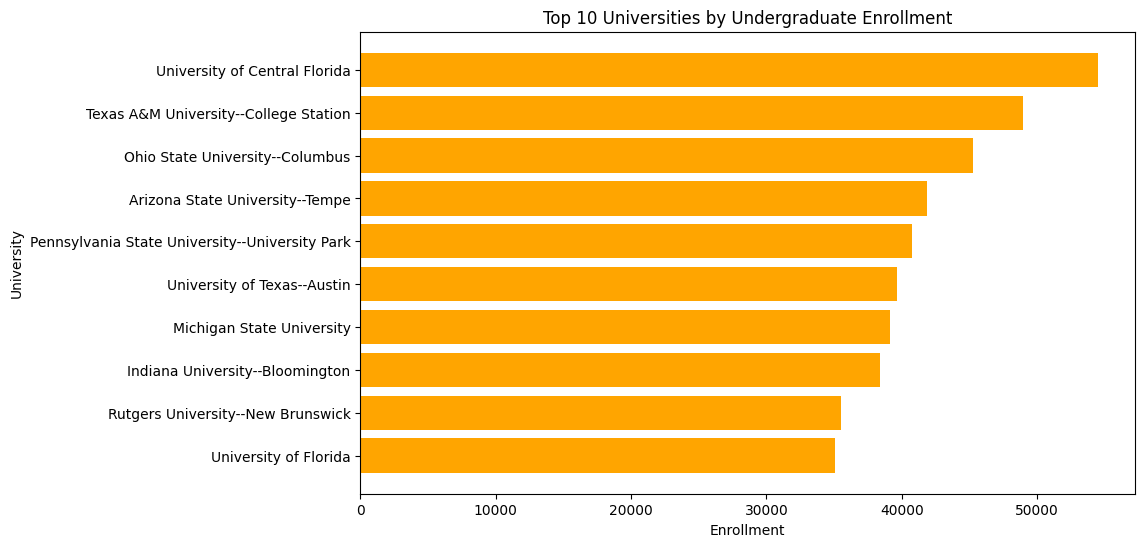

In [13]:
# -----------------------------------------
# National Universities Rankings - Analysis
# -----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Dataset
file_path = "National Universities Rankings (1).csv"   # change path if needed
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Convert Tuition (remove $ and ,) → numeric
df['Tuition and fees'] = df['Tuition and fees'].replace('[\$,]', '', regex=True).astype(float)

# Convert Enrollment (remove ,) → numeric
df['Undergrad Enrollment'] = df['Undergrad Enrollment'].replace('[,]', '', regex=True).astype(float)

# Select relevant columns
df_clean = df[['Name', 'Location', 'Rank', 'Tuition and fees', 'Undergrad Enrollment']]

# 3. Show Top 5 Universities by Rank
print("Top 5 Universities by Rank:\n")
print(df_clean.sort_values('Rank').head())

# 4. Correlation Analysis
correlation = df_clean[['Rank', 'Tuition and fees', 'Undergrad Enrollment']].corr(method='pearson')
print("\nCorrelation Matrix:\n")
print(correlation)

# 5. Visualization

# Tuition vs Rank
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Rank'], df_clean['Tuition and fees'], alpha=0.7)
plt.title("Tuition Fees vs University Rank")
plt.xlabel("Rank (Lower is Better)")
plt.ylabel("Tuition Fees (USD)")
plt.grid(True)
plt.show()

# Enrollment vs Rank
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Rank'], df_clean['Undergrad Enrollment'], alpha=0.7, color='green')
plt.title("Undergraduate Enrollment vs University Rank")
plt.xlabel("Rank (Lower is Better)")
plt.ylabel("Enrollment")
plt.grid(True)
plt.show()

# Top 10 by Enrollment
top10_enrollment = df_clean.nlargest(10, 'Undergrad Enrollment')
plt.figure(figsize=(10,6))
plt.barh(top10_enrollment['Name'], top10_enrollment['Undergrad Enrollment'], color='orange')
plt.title("Top 10 Universities by Undergraduate Enrollment")
plt.xlabel("Enrollment")
plt.ylabel("University")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

# 6. Save Correlation Results for Paper Table
correlation.to_csv("correlation_results.csv", index=True)
